<a href="https://colab.research.google.com/github/minhducvo04/PyTorch-models/blob/main/PyTorch_Convolutional_Neural_Network(CNN)_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Convolutional Neural Network (CNN)
CNN's are also known ConNets.

CNN's are known for their capabilities to find patterns in visual data.

## Prepare

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import models
from torchvision import transforms
from torchvision.transforms import ToTensor 
from torchvision import datasets
from torch.utils.data import DataLoader

In [ ]:
# Device agnoistic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", #Where to download data to
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(), #How do we want to transform the data
    target_transform=None
)
test_data = datasets.FashionMNIST(
    root="data", #Where to download data to
    train=False,
    download=True,
    transform=ToTensor(), #How do we want to transform the data
    target_transform=None
)

In [ ]:
#Set up batch-size hyperparameter
BATCH_SIZE=32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f3d17db1b50>,
 <torch.utils.data.dataloader.DataLoader at 0x7f3d17d2a3d0>)

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
from torch.nn.modules.pooling import MaxPool2d
# Create a convolutional neural network
class FashionMNISTModelV0(nn.Module):
  """
  Replicate Model VGG (an example of convolutional neural network architecture)
  """
  def __init__(self,
               input_shape:int,
               output_shape:int,
               hidden_units:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        # Create a conv2d layer
        nn.Conv2d(in_channels=input_shape, 
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1,
                  stride=1), #Value we can set in our NN is hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  padding=1,
                  stride=1,
                  kernel_size=3),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)

    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape),
        nn.Flatten()
    )
  def forward(self, x):
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))
    

In [ ]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_0, next(model_0.parameters()).device

(FashionMNISTModelV0(
   (conv_block_1): Sequential(
     (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (conv_block_2): Sequential(
     (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (classifier): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=490, out_features=10, bias=True)
     (2): Flatten(start_dim=1, end_dim=-1)
   )
 ), device(type='cuda', index=0))

## Stepping through `nn.Conv2d`

In [ ]:
torch.manual_seed(42)

# Create of batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]
print (f"Image batch shape: {images.shape}")
print (f"Single image shape: {test_image.shape}")
print (f"Test image: \n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image: 
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-

In [ ]:
# Test a conv2d layer
conv2d_layer = nn.Conv2d(in_channels=3,
                   out_channels=10,
                   padding=1,
                   kernel_size=3,
                   stride=1)
conv_output = conv2d_layer(test_image)
conv_output, conv_output.shape, test_image.shape

(tensor([[[ 1.6446e-01, -6.2518e-01, -7.7713e-01,  ..., -3.2504e-01,
           -3.1604e-01,  4.5352e-01],
          [ 3.5455e-01, -2.8778e-01, -6.0596e-02,  ...,  6.6224e-01,
           -2.3216e-01,  7.7080e-01],
          [-4.5420e-02, -9.8911e-01, -4.0099e-01,  ..., -1.8552e-01,
           -5.7622e-01,  4.2301e-01],
          ...,
          [ 2.9288e-01, -1.4512e-01, -1.1566e-01,  ..., -3.6626e-01,
            3.5645e-01,  2.8384e-01],
          [ 2.0746e-01,  3.6096e-02,  1.5214e-01,  ..., -4.9680e-01,
           -7.2258e-01, -8.3858e-02],
          [-3.2457e-01, -3.2326e-01,  9.5475e-02,  ...,  5.9960e-01,
            3.2819e-01,  3.6604e-01]],
 
         [[ 1.2406e+00,  2.2794e-01, -1.8362e-01,  ..., -6.3520e-01,
           -7.5413e-01,  4.0612e-01],
          [ 4.1380e-01, -1.0853e+00, -1.6079e+00,  ..., -1.7643e+00,
            2.5263e-01,  3.8844e-01],
          [ 5.3442e-01, -8.2507e-01,  6.3866e-01,  ...,  4.8068e-01,
            8.4869e-01, -1.5706e-01],
          ...,
    

## Stepping through `nn.MaxPool2d`

In [ ]:
# Print out original image shape without unsqueezed dimension
print (f"Test image original shape: {test_image.shape})")
print (f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

Test image original shape: torch.Size([3, 64, 64]))
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])


In [ ]:
maxpool2d_layer = nn.MaxPool2d(kernel_size = 2)
after_conv2d=conv2d_layer(test_image.unsqueeze(0))
print(f"Test image after conv2d layer: {after_conv2d.shape}")
after_maxpool2d=maxpool2d_layer(after_conv2d)
print(f"Test image after maxpool2d layer: {after_maxpool2d.shape}")

Test image after conv2d layer: torch.Size([1, 10, 64, 64])
Test image after maxpool2d layer: torch.Size([1, 10, 32, 32])


In [ ]:
torch.manual_seed(42)
# Create a random tensor
random_tensor = torch.randn(size=(1,1,2,2))
print(f"Random tensor: \n {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")
random_maxpool_tensor = maxpool2d_layer(random_tensor)
print(f"Maxpool tensor: \n {random_maxpool_tensor}")
print(f"Maxpool tensor shape: {random_maxpool_tensor.shape}")

Random tensor: 
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])
Maxpool tensor: 
 tensor([[[[0.3367]]]])
Maxpool tensor shape: torch.Size([1, 1, 1, 1])


In [ ]:
random_image = torch.randn(size=(1,28,28))
random_image.shape

torch.Size([1, 28, 28])

In [ ]:
model_0(random_image.unsqueeze(0).to(device))

tensor([[ 0.0424, -0.0839,  0.0839, -0.0463,  0.0053,  0.0437,  0.0025,  0.0108,
         -0.0158, -0.0177]], device='cuda:0', grad_fn=<AddmmBackward0>)

# Real data testing!!!

## Set up function of accuracy, loss, and optimizer

In [ ]:
 # Calculate accuracy - what percentage does the model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [ ]:
# Set up loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr = 0.03)

## Set up training step and testing step

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               epoch,
               device: torch.device = device,
               ):
  rows, cols = 5,5
  fig = plt.figure(figsize=(12.5,12.5))
  i = 1
  j = 1
  idb = torch.randint(76,78,size=[1]).item()
  idi = torch.randint(0,31,size=[1]).item()
  torch.manual_seed(42)
  ### Training
  train_loss, train_acc = 0, 0
  # Add a loop through training batches
  for batch, (X,y) in enumerate(data_loader):
    X,y=X.to(device),y.to(device)
    model.train()
    # Put data on target device
    X,y = X.to(device), y.to(device)
    # 1. Forward pass
    y_pred = model(X).to(device)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y).to(device)
    train_loss = train_loss + loss #Accumulate train loss
    train_acc = train_acc + accuracy_fn(y_true=y,
                                        y_pred=y_pred.argmax(dim=1))


    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out what's happening
    
    if batch % idb == 0 and epoch:
      image, label = X[idi].cpu(), y[idi].cpu()
      fig.add_subplot(rows,cols,i)
      plt.imshow(image.squeeze().cpu(), cmap = "gray")
      plt.axis(False);
      l = class_names[y_pred[idi].argmax(dim=0)]
      plt.title(f"{l}({class_names[label]})");
      i = i + 1
    
    if batch % 370 == 0:
      print(f"Looked at batch {batch*len(X)}/{len(data_loader.dataset)} samples.")

  # Divide total train loss and accuracy by length of dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print (f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [ ]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  rows, cols = 5,5
  torch.manual_seed(42)
  #show = 111 #torch.randint(119,124,size=[1]).item()
  #id = 12 #torch.randint(0,31,size=[1]).item()
  ### Training
  test_loss, test_acc = 0, 0
  # Put in evaluation mode
  model_0.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X,y=X.to(device),y.to(device)
      # 1. Forward pass
      test_pred = model(X)

      # 2. Calculate the loss and accuracy
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))

    # Calculate the average test loss and accuracy per batch
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print (f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

In [ ]:
torch.manual_seed(42)
from tqdm.auto import tqdm
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module, 
              accuracy_fn,
              device):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X,y=X.to(device),y.to(device)
      # Make predictions
      y_pred = model(X.to(device)).to(device)
      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax (dim=1))
    # Scale loss and acc to find the average loss/acc per batch
    loss /= len (data_loader)
    acc /= len (data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}
# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader, 
                             loss_fn=loss_fn, 
                             accuracy_fn=accuracy_fn,
                             device=device)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 2.3021297454833984,
 'model_acc': 9.994009584664537}

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 0-----
Looked at batch 0/60000 samples.
Looked at batch 11840/60000 samples.
Looked at batch 23680/60000 samples.
Looked at batch 35520/60000 samples.
Looked at batch 47360/60000 samples.
Looked at batch 59200/60000 samples.
Train loss: 0.74742 | Train acc: 72.95%
Test loss: 0.47581 | Test acc: 83.17%
Epoch: 1-----
Looked at batch 0/60000 samples.
Looked at batch 11840/60000 samples.
Looked at batch 23680/60000 samples.
Looked at batch 35520/60000 samples.
Looked at batch 47360/60000 samples.
Looked at batch 59200/60000 samples.
Train loss: 0.43493 | Train acc: 84.33%
Test loss: 0.40941 | Test acc: 85.69%
Epoch: 2-----
Looked at batch 0/60000 samples.
Looked at batch 11840/60000 samples.
Looked at batch 23680/60000 samples.
Looked at batch 35520/60000 samples.
Looked at batch 47360/60000 samples.
Looked at batch 59200/60000 samples.
Train loss: 0.37859 | Train acc: 86.32%
Test loss: 0.37367 | Test acc: 86.95%
Epoch: 3-----
Looked at batch 0/60000 samples.
Looked at batch 11840/6

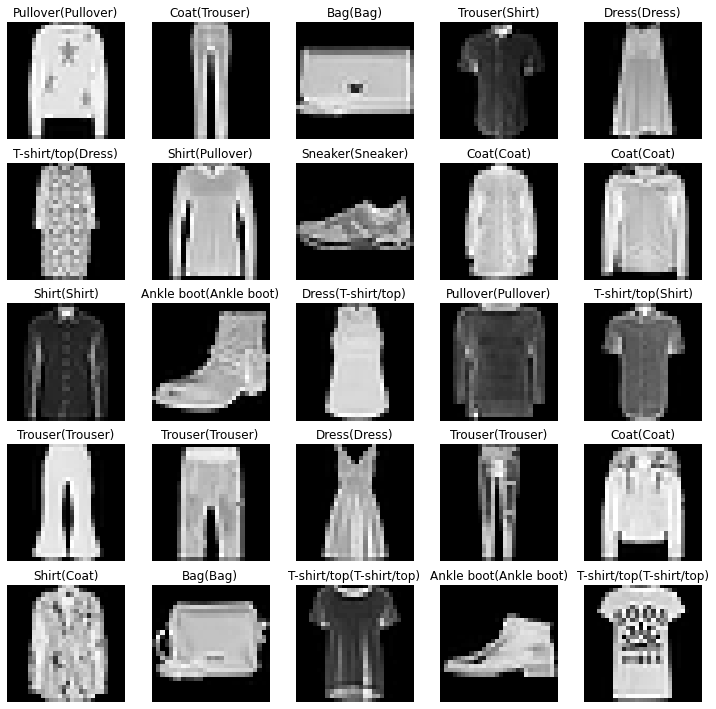

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

In [ ]:
ide = torch.randint(0,3,size=[1]).item()
torch.manual_seed(42)

train_time_start_CNN = timer()

# Training and testing loop
epochs = 4
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}-----")
  train_step(model=model_0.to(device),
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device,
             epoch=(epoch==ide))
  test_step(model=model_0,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end_CNN = timer()
total_train_time_CNN = print_train_time(start=train_time_start_CNN,end=train_time_end_CNN,device=device)

In [ ]:
model_0_result = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)
model_0_result

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.35418447852134705,
 'model_acc': 87.52995207667732}

## Make and evaluate random predictions with the best model

In [ ]:
def make_prediction(model:torch.nn.Module,
                    data:list,
                    device:torch.device=device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass it into our device)
      sample = torch.unsqueeze(sample,dim=0).to(device)
       
      # Forward pass
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)

      # Get pred prob off the GPU for further calculation
      pred_probs.append(pred_prob.cpu())

  # Stack the pred probs to turn list into tensor
  return torch.stack(pred_probs)

In [ ]:
img, label = test_data[0][:2]
for im in img:
  print(f"{img.shape}\n")
print(class_names[label])

torch.Size([1, 28, 28])

Ankle boot


torch.Size([1, 28, 28])


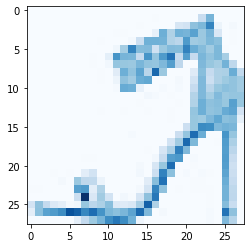

In [ ]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=25):
  test_samples.append(sample)
  test_labels.append(label)
print(test_samples[0].shape)
plt.imshow(test_samples[0].squeeze(), cmap = "Blues")

In [ ]:
pred_probs = make_prediction(model=model_0,
                             data=test_samples,
                             device=device)
pred_probs[:2]


tensor([[2.0380e-05, 3.0160e-05, 1.3681e-06, 2.7830e-05, 1.4786e-06, 9.9972e-01,
         2.5441e-06, 4.7702e-06, 1.5434e-04, 3.4932e-05],
        [2.3937e-07, 1.8450e-08, 4.9969e-08, 2.6052e-08, 2.9685e-08, 2.2393e-04,
         1.0941e-06, 4.3461e-05, 3.0599e-05, 9.9970e-01]])

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes, test_labels

(tensor([5, 9, 5, 8, 0, 8, 8, 4, 3, 3, 7, 9, 9, 4, 2, 0, 8, 7, 2, 3, 9, 8, 5, 7,
         0]),
 [5, 9, 5, 8, 6, 8, 8, 3, 3, 3, 7, 9, 9, 4, 2, 0, 8, 7, 2, 3, 9, 8, 5, 7, 0])

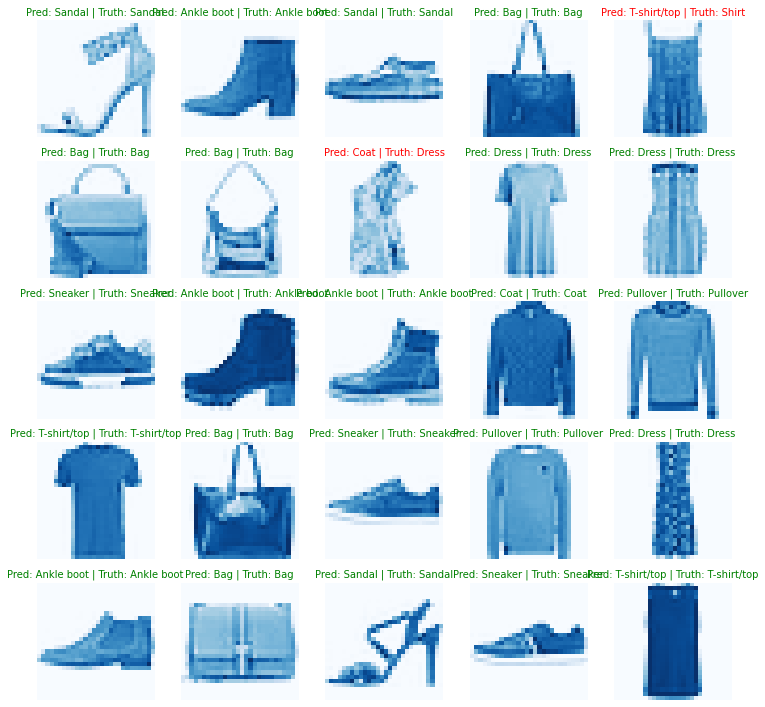

In [ ]:
# Plot predictions
plt.figure(figsize = (12.5,12.5))
nrows = 5
ncols = 5
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot out
  plt.imshow(sample.squeeze(), cmap = "Blues")

  # Find the prediction
  pred_label = class_names[pred_classes[i]]

  # Get truth label
  truth_label = class_names[test_labels[i]]

  # Create the title
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality of the predictions and change the title name
  color = "g" if pred_label == truth_label else "r"
  plt.title(title_text,fontsize = 10, c=color)
  
  plt.axis(False);

## Making a confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating you classification models visually
1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix by mlxtend

In [ ]:
import mlxtend
mlxtend.__version__

'0.21.0'

In [ ]:
# 1. Make predictions with our trained model 
y_preds = []
model_0.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc = "Making predictions..."):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_logit = model_0(X)
    # Turn logit into prediction probabilities 
    y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate the list of predictions into a tensor 
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
# Try if required packages are install, if not, install
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert mlxtend.__version__.split(".")[1] >= 19, "mlxtend should be 0.19.0 or higher"
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.21.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mlxtend version: 0.21.0


In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Set up confusion instance and compare the predictions to the targets
confmat = ConfusionMatrix(num_classes=len(class_names),task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)
confmat_tensor

tensor([[616,   7,  33,  91,   8,   1, 234,   0,  10,   0],
        [ 22, 800,  12, 125,  31,   0,   6,   0,   4,   0],
        [ 14,   3, 713,  20, 129,   0, 109,   0,  12,   0],
        [ 35,   8,  18, 856,  37,   0,  37,   0,   7,   2],
        [  5,   7, 116,  49, 668,   0, 139,   0,  16,   0],
        [  3,   2,   0,   3,   1, 775,   3,  97,  85,  31],
        [ 88,   6, 110,  63,  67,   0, 645,   0,  21,   0],
        [  1,   0,   0,   0,   0,  26,   0, 922,  12,  39],
        [  9,   2,  14,  11,   7,   8,  31,   7, 910,   1],
        [  1,   0,   0,   3,   0,  30,   1, 110,  22, 833]])

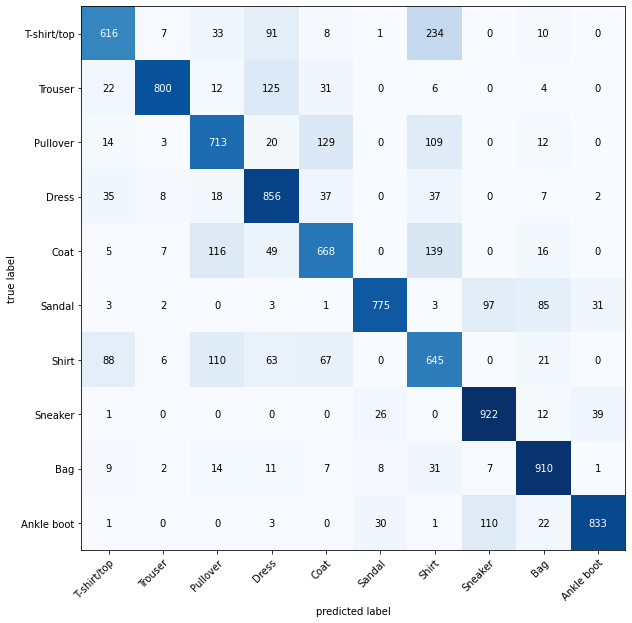

In [ ]:
# Plot confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,10)
)

In [ ]:
## Save the best model

from pathlib import Path
# Create model dictory path
MODEL_PATH = Path( "models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)
# Create model save
MODEL_NAME = "PyTorch_CNN_Model_For_Computer_Vision.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

PosixPath('models/PyTorch_CNN_Model_For_Computer_Vision.pth')

In [ ]:
## Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/PyTorch_CNN_Model_For_Computer_Vision.pth


In [ ]:
image_shape = [1,28,28]
test_image.shape, image_shape

(torch.Size([3, 64, 64]), [1, 28, 28])

In [ ]:
# Create new instance 
torch.manual_seed(42)
loaded_model_0 = FashionMNISTModelV0(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH ))
# Send model to targeted device
loaded_model_0.to(device)
next(loaded_model_0.parameters()).device, model_0_result

(device(type='cuda', index=0),
 {'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.35418447852134705,
  'model_acc': 87.52995207667732})

In [ ]:
loaded_model_0.to(device)

FashionMNISTModelV0(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
    (2): Flatten(start_dim=1, end_dim=-1)
  )
)

In [ ]:
model_0_result

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.35418447852134705,
 'model_acc': 87.52995207667732}

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)
loaded_model_0_results = eval_model(model=loaded_model_0, 
                                    data_loader=test_dataloader, 
                                    loss_fn=loss_fn, 
                                    accuracy_fn=accuracy_fn,
                                    device=device)
loaded_model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.35418447852134705,
 'model_acc': 87.52995207667732}

In [ ]:
# Check if the results are close to each other
torch.isclose(torch.tensor(model_0_result["model_loss"]),
              torch.tensor(loaded_model_0_results["model_loss"]),
              atol=1e-10)

tensor(True)